<a href="https://colab.research.google.com/github/shivam221997/Machine_learning_based_Baseline_energy_consumption_Prediction-_model/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Load the data
data = pd.read_csv('/content/new_data_regg.csv')

In [3]:
data.head()

,kwh,cdd
0,2493,142.9
1,2255,138.2
2,2215,120.7
3,2621,119.8
4,2338,130.0


In [4]:
data.isnull().sum()

kwh    0
cdd    0
dtype: int64

In [5]:
data.corr()

,kwh,cdd
kwh,1.000000,0.754532
cdd,0.754532,1.000000


<Axes: xlabel='cdd', ylabel='kwh'>

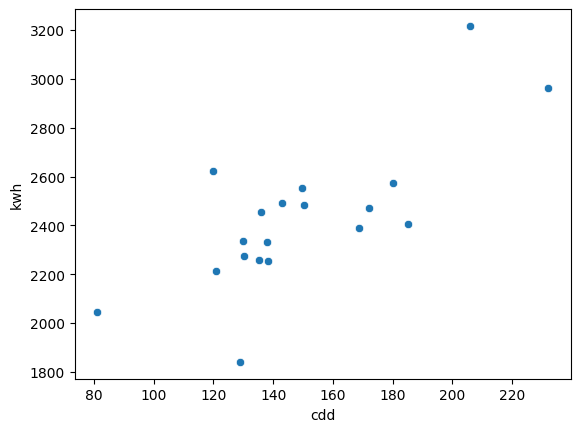

In [6]:
sns.scatterplot(x=data['cdd'],y=data['kwh'])

<Axes: ylabel='cdd'>

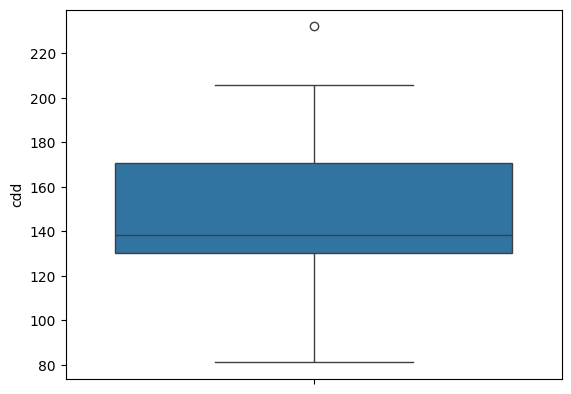

In [7]:
sns.boxplot(data['cdd'])


<Axes: ylabel='kwh'>

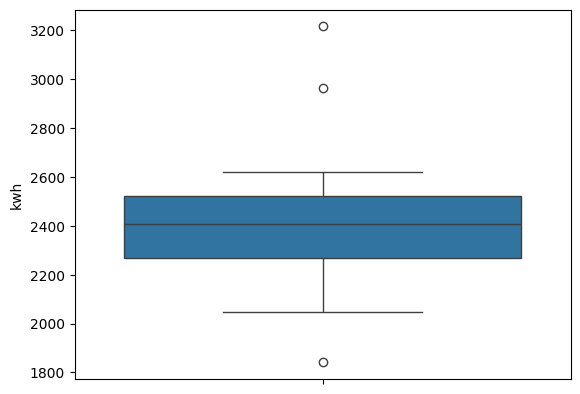

In [8]:
sns.boxplot(data['kwh'])

In [10]:

# Split the data into features (CDD) and target variable (KWH)
X = data[['cdd']]
y = data[['kwh']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2_score = model.score(X_train, y_train)
# You can also print the coefficients of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"R-squared value: {r2_score}")

Mean Squared Error: 42381.69622140478
Coefficients: [[7.91326949]]
Intercept: [1240.08818636]
R-squared value: 0.7385307231301806


In [11]:
# Get the coefficient and intercept
m = model.coef_[0]
c = model.intercept_

# Print the linear equation
print("Linear Equation: y =", m, "* CDD_OLD +", c)




Linear Equation: y = [7.91326949] * CDD_OLD + [1240.08818636]


In [12]:
# Get the new x and actual y values from the user
CDD = float(input("Enter the value of x: "))



Enter the value of x: 152


In [13]:
def predict_y(model, coefficient, intercept, CDD):
    # Predict the y value using the linear equation y = mx + c
    baseline= coefficient * CDD + intercept
    return baseline



In [14]:
# Predict the corresponding y value
baseline = predict_y(model, m, c, CDD)
print("adjusted baseline for new CDD =", CDD, "is:",baseline)




adjusted baseline for new CDD = 152.0 is: [2442.90514861]


In [24]:
actual_consumption = float(input("Enter the actual value of y: "))

Enter the actual value of y: 2122


In [25]:


def calculate_difference_and_percent_change(model, coefficient, intercept, CDD, actual_consumption):
    # Predict the y value using the linear equation y = mx + c
    baseline = coefficient * CDD + intercept

    # Calculate the difference between predicted y and actual y
    difference =  baseline - actual_consumption

    # Calculate the percent change
    percent_change = (difference / actual_consumption) * 100
    return difference, percent_change





In [26]:

# Calculate the difference between predicted y and actual y, and percent change
difference, percent_change = calculate_difference_and_percent_change(model, m, c, CDD, actual_consumption)
print("Difference between predicted and actual y for x =", CDD, "is:", difference)
print("Percent change between predicted and actual y for x =", CDD, "is:", percent_change, "%")

Difference between predicted and actual y for x = 152.0 is: [320.90514861]
Percent change between predicted and actual y for x = 152.0 is: [15.12276855] %


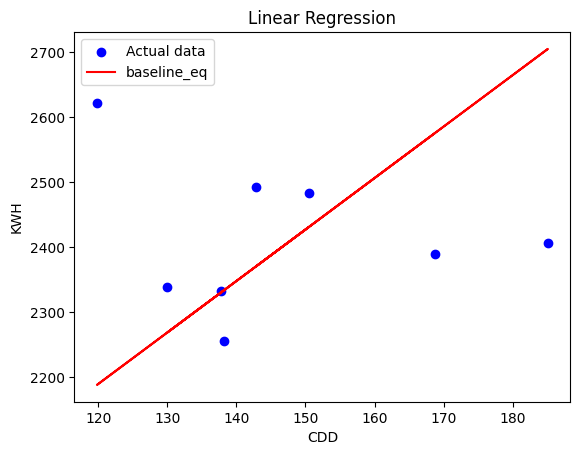

In [27]:
# Plot the data points and the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='baseline_eq')

# Add labels and legend
plt.xlabel('CDD')
plt.ylabel('KWH')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()


In [28]:
# Take input for baseline and actual_consumption
baseline = float(input("Enter the baseline consumption: "))
actual_consumption = float(input("Enter the actual consumption: "))

Enter the baseline consumption: 2442.20
Enter the actual consumption: 2122


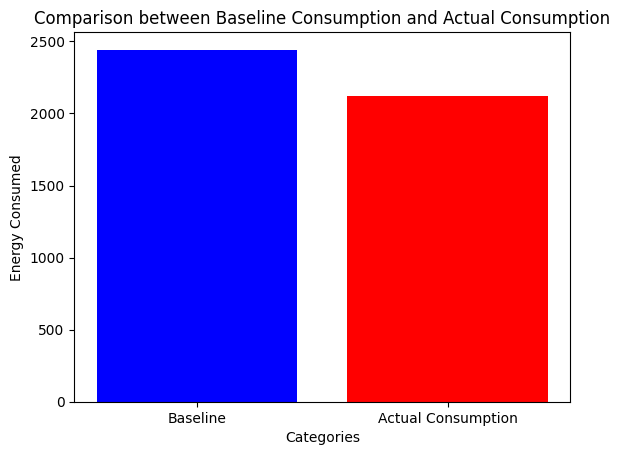

In [29]:
import matplotlib.pyplot as plt

def plot_baseline_vs_actual(baseline, actual_consumption):
    # Categories for plotting
    categories = ['Baseline', 'Actual Consumption']

    values = [baseline, actual_consumption]

    colors = ['blue', 'red']

    plt.bar(categories, values, color=colors)

    plt.xlabel('Categories')
    plt.ylabel('Energy Consumed')
    plt.title('Comparison between Baseline Consumption and Actual Consumption')
    plt.show()

# Plotting the bar graph
plot_baseline_vs_actual(baseline, actual_consumption)






